In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
def scale(x_train, x_test):
    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train = pd.DataFrame(scaler.transform(x_train), 
                           index=x_train.index, 
                           columns=x_train.columns)

    x_test = pd.DataFrame(scaler.transform(x_test),
                          index=x_test.index, 
                          columns=x_test.columns)
    return x_train, x_test

def display_metrics(classifier, x, y, prediction):

    print("Confusion matrix: \n")
    plt.show(metrics.plot_confusion_matrix(classifier, x, y, normalize='true'))
    
    labels = np.unique(y_test.damage_grade)
    # labels should by default but let's be explicit; also, normalize over the true values, i.e., 
    # return how often a class gets mis-classified or rightly classified
    cm_array = metrics.confusion_matrix(y, prediction, labels=labels, normalize='true')
    cm = pd.DataFrame(cm_array, columns=labels, index=labels)
    
    cf = metrics.classification_report(y, prediction)
    print("Classification report: \n")
    print(cf)

    f1 = metrics.f1_score(y, prediction, average='micro')
    print("Micro-F1 score: \n")
    print(f1)

    f2 = metrics.f1_score(y, prediction, average='macro')
    print("Macro-F1 score:")
    print(f1)
    
    return cm, cf, f1, f2

2. Redo all with three classes!
3. Calculate all metrics, make table with f1 scores, compare ROC curves and AUC etc (consider new jupyter)
4. Fine tune a NN and redo all steps.

In [3]:
grid_search_rf = joblib.load('results/rf_gridsearch.joblib')

In [4]:
grid_search_rf.best_params_

{'randomforestclassifier__max_depth': 20,
 'randomforestclassifier__max_features': 12,
 'randomforestclassifier__n_estimators': 200}

In [5]:
rf_cls = RandomForestClassifier(n_estimators=200, max_depth=20, max_features=12)

### 1.1. Original set

In [6]:
x = pd.read_csv('processed_data/x_post_preproc.csv', index_col='building_id')
y = pd.read_csv('processed_data/y_post_preproc.csv', index_col='building_id')

In [7]:
x_train, x_test = train_test_split(x, test_size=0.2, random_state=42)
y_train, y_test = y.loc[x_train.index], y.loc[x_test.index]

In [8]:
x_train_norm, x_test_norm = scale(x_train, x_test)

In [9]:
rf_cls.fit(x_train_norm, y_train.values.ravel())

RandomForestClassifier(max_depth=20, max_features=12, n_estimators=200)

Confusion matrix: 



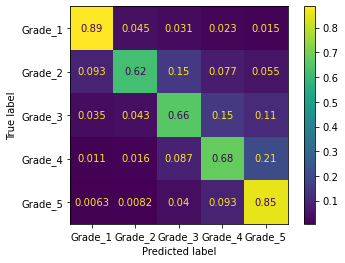

Classification report: 

              precision    recall  f1-score   support

     Grade_1       0.81      0.89      0.85     63007
     Grade_2       0.79      0.62      0.70     69799
     Grade_3       0.68      0.66      0.67    109199
     Grade_4       0.69      0.68      0.69    146850
     Grade_5       0.80      0.85      0.82    220820

    accuracy                           0.75    609675
   macro avg       0.75      0.74      0.74    609675
weighted avg       0.75      0.75      0.75    609675

Micro-F1 score: 

0.7528322466888097
Macro-F1 score:
0.7528322466888097


In [10]:
prediction_train = rf_cls.predict(x_train_norm)

train_metrics = display_metrics(rf_cls, 
                                x_train_norm,
                                y_train, prediction_train)

## make a function that needs not classifier, so you only save prediction and prediction proba - maybe save the two in the same file - how is prediction made from the prediction proba? - maybe .5 threshold per class, check

Confusion matrix: 



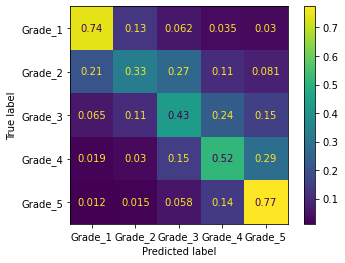

Classification report: 

              precision    recall  f1-score   support

     Grade_1       0.63      0.74      0.68     15808
     Grade_2       0.45      0.33      0.38     17458
     Grade_3       0.45      0.43      0.44     27213
     Grade_4       0.53      0.52      0.52     36994
     Grade_5       0.72      0.77      0.75     54946

    accuracy                           0.60    152419
   macro avg       0.56      0.56      0.56    152419
weighted avg       0.59      0.60      0.59    152419

Micro-F1 score: 

0.5967956750798785
Macro-F1 score:
0.5967956750798785


In [11]:
prediction_test = rf_cls.predict(x_test_norm)

test_metrics = display_metrics(rf_cls, 
                               x_test_norm, 
                               y_test, prediction_test)

In [12]:
joblib.dump(rf_cls, 'results/rf_orig.joblib', compress=1)

['results/rf_orig.joblib']

### 1.2 Resampled set:

#### 1.2.1 Over-sampling with SMOTENC

In [13]:
x_train_smotenc = pd.read_csv('processed_data/resampling/x_train_smotenc.csv', index_col=0).reset_index(drop=True)
y_train_smotenc = pd.read_csv('processed_data/resampling/y_train_smotenc.csv', index_col=0).reset_index(drop=True)

C:\Users\aleciu\Anaconda3\envs\ml\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [14]:
x_train_smotenc_norm, x_test_smotenc_norm = scale(x_train_smotenc, x_test)

In [15]:
rf_cls.fit(x_train_smotenc_norm, y_train_smotenc.values.ravel())

RandomForestClassifier(max_depth=20, max_features=12, n_estimators=200)

Confusion matrix: 



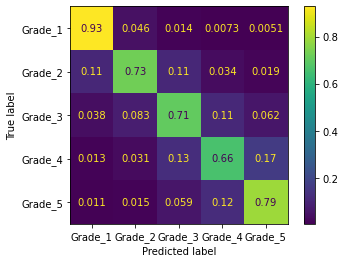

Classification report: 

              precision    recall  f1-score   support

     Grade_1       0.84      0.93      0.88    220820
     Grade_2       0.81      0.73      0.77    220820
     Grade_3       0.70      0.71      0.70    220820
     Grade_4       0.71      0.66      0.68    220820
     Grade_5       0.76      0.79      0.77    220820

    accuracy                           0.76   1104100
   macro avg       0.76      0.76      0.76   1104100
weighted avg       0.76      0.76      0.76   1104100

Micro-F1 score: 

0.7634453400960058
Macro-F1 score:
0.7634453400960058


In [16]:
prediction_train = rf_cls.predict(x_train_smotenc_norm)

train_metrics = display_metrics(rf_cls,
                                x_train_smotenc_norm,
                                y_train_smotenc, prediction_train)

Confusion matrix: 



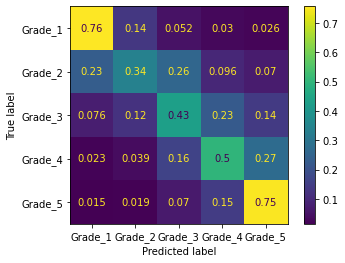

Classification report: 

              precision    recall  f1-score   support

     Grade_1       0.60      0.76      0.67     15808
     Grade_2       0.43      0.34      0.38     17458
     Grade_3       0.44      0.43      0.43     27213
     Grade_4       0.53      0.50      0.52     36994
     Grade_5       0.73      0.75      0.74     54946

    accuracy                           0.59    152419
   macro avg       0.54      0.56      0.55    152419
weighted avg       0.58      0.59      0.58    152419

Micro-F1 score: 

0.5869018954329841
Macro-F1 score:
0.5869018954329841


In [17]:
prediction_test = rf_cls.predict(x_test_smotenc_norm)

test_metrics = display_metrics(rf_cls,
                               x_test_smotenc_norm,
                               y_test, prediction_test)

In [18]:
joblib.dump(rf_cls, 'results/rf_smotenc.joblib', compress=1)

['results/rf_smotenc.joblib']

### 1.2.2 Under-sampling: cleaning oversampled dataset

#### 1.2.2.1 Tomek

In [19]:
x_train_smotenc_tmk = pd.read_csv('processed_data/resampling/x_train_smotenc_tmk.csv', index_col=0).reset_index(drop=True)
y_train_smotenc_tmk = pd.read_csv('processed_data/resampling/y_train_smotenc_tmk.csv', index_col=0).reset_index(drop=True)

In [20]:
x_train_smotenc_tmk_norm, x_test_smotenc_tmk_norm = scale(x_train_smotenc_tmk, x_test)

In [21]:
rf_cls.fit(x_train_smotenc_tmk_norm, y_train_smotenc_tmk.values.ravel())

RandomForestClassifier(max_depth=20, max_features=12, n_estimators=200)

Confusion matrix: 



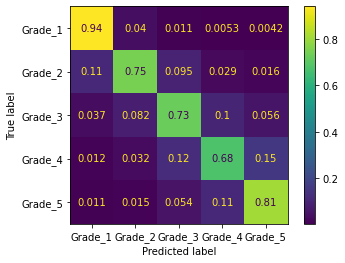

Classification report: 

              precision    recall  f1-score   support

     Grade_1       0.86      0.94      0.90    198969
     Grade_2       0.82      0.75      0.78    183975
     Grade_3       0.72      0.73      0.72    174207
     Grade_4       0.73      0.68      0.70    169016
     Grade_5       0.78      0.81      0.79    171449

    accuracy                           0.79    897616
   macro avg       0.78      0.78      0.78    897616
weighted avg       0.78      0.79      0.78    897616

Micro-F1 score: 

0.7853859556870644
Macro-F1 score:
0.7853859556870644


In [22]:
prediction_train = rf_cls.predict(x_train_smotenc_tmk_norm)

train_metrics = display_metrics(rf_cls,
                                x_train_smotenc_tmk_norm,
                                y_train_smotenc_tmk, prediction_train)

Confusion matrix: 



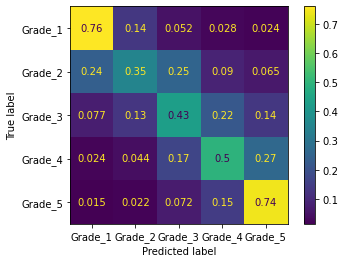

Classification report: 

              precision    recall  f1-score   support

     Grade_1       0.60      0.76      0.67     15808
     Grade_2       0.41      0.35      0.38     17458
     Grade_3       0.43      0.43      0.43     27213
     Grade_4       0.53      0.50      0.51     36994
     Grade_5       0.73      0.74      0.74     54946

    accuracy                           0.58    152419
   macro avg       0.54      0.56      0.55    152419
weighted avg       0.58      0.58      0.58    152419

Micro-F1 score: 

0.584927076020706
Macro-F1 score:
0.584927076020706


In [23]:
prediction_test = rf_cls.predict(x_test_smotenc_tmk_norm)

test_metrics = display_metrics(rf_cls,
                               x_test_smotenc_tmk_norm,
                               y_test, prediction_test)

In [24]:
joblib.dump(rf_cls, 'results/rf_smotenc_tmk.joblib', compress=1)

['results/rf_smotenc_tmk.joblib']

#### 1.2.2.2 ENN

In [25]:
x_train_smotenc_enn = pd.read_csv('processed_data/resampling/x_train_smotenc_enn.csv', index_col=0).reset_index(drop=True)
y_train_smotenc_enn = pd.read_csv('processed_data/resampling/y_train_smotenc_enn.csv', index_col=0).reset_index(drop=True)

In [26]:
x_train_smotenc_enn_norm, x_test_smotenc_enn_norm = scale(x_train_smotenc_enn, x_test)

In [27]:
rf_cls.fit(x_train_smotenc_enn_norm, y_train_smotenc_enn.values.ravel())

RandomForestClassifier(max_depth=20, max_features=12, n_estimators=200)

Confusion matrix: 



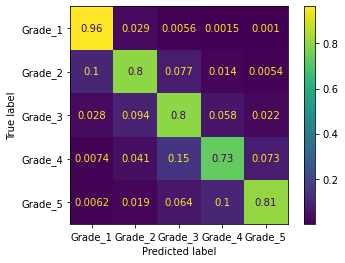

Classification report: 

              precision    recall  f1-score   support

     Grade_1       0.91      0.96      0.93    170370
     Grade_2       0.85      0.80      0.83    132390
     Grade_3       0.76      0.80      0.78    100224
     Grade_4       0.80      0.73      0.77     72822
     Grade_5       0.83      0.81      0.82     50844

    accuracy                           0.84    526650
   macro avg       0.83      0.82      0.82    526650
weighted avg       0.84      0.84      0.84    526650

Micro-F1 score: 

0.8442893762460837
Macro-F1 score:
0.8442893762460837


In [28]:
prediction_train = rf_cls.predict(x_train_smotenc_enn_norm)

train_metrics = display_metrics(rf_cls,
                                x_train_smotenc_enn_norm,
                                y_train_smotenc_enn, prediction_train)

Confusion matrix: 



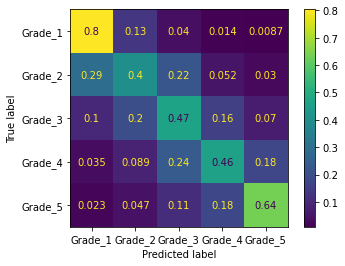

Classification report: 

              precision    recall  f1-score   support

     Grade_1       0.55      0.80      0.65     15808
     Grade_2       0.34      0.40      0.37     17458
     Grade_3       0.40      0.47      0.43     27213
     Grade_4       0.53      0.46      0.49     36994
     Grade_5       0.79      0.64      0.71     54946

    accuracy                           0.56    152419
   macro avg       0.52      0.56      0.53    152419
weighted avg       0.58      0.56      0.56    152419

Micro-F1 score: 

0.5556131453427722
Macro-F1 score:
0.5556131453427722


In [29]:
prediction_test = rf_cls.predict(x_test_smotenc_enn_norm)

test_metrics = display_metrics(rf_cls,
                               x_test_smotenc_enn_norm,
                               y_test, prediction_test)

In [30]:
joblib.dump(rf_cls, 'results/rf_smotenc_enn.joblib', compress=1)

['results/rf_smotenc_enn.joblib']

### -> check ROC curves, that requires looking at the prob scores and think of how to deal with multi-class problems

Micro-F1 is **the same** as accuracy in problems where each instance is assigned one (and only one) class
    https://simonhessner.de/why-are-precision-recall-and-f1-score-equal-when-using-micro-averaging-in-a-multi-class-problem/

- accuracy is the average of the f1 scores
- macro avg is the average between the unweighted precision and recall averages
- weighted avg is the average between the (support)-weighted precision and recall averages

support is the number of instances in each class

## 3-Class classification:

In [7]:
x = pd.read_csv('processed_data/x_post_preproc.csv', index_col='building_id')
y = pd.read_csv('processed_data/y_post_preproc_3lab.csv', index_col='building_id')

In [8]:
x_train, x_test = train_test_split(x, test_size=0.2, random_state=42)
y_train, y_test = y.loc[x_train.index], y.loc[x_test.index]

In [9]:
x_train_norm, x_test_norm = scale(x_train, x_test)

In [10]:
rf_cls.fit(x_train_norm, y_train.values.ravel())

RandomForestClassifier(max_depth=20, max_features=12, n_estimators=200)

Confusion matrix: 



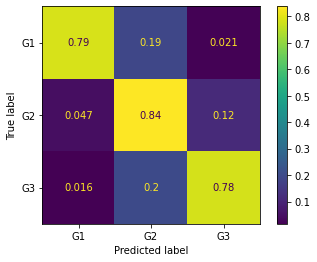

Classification report: 

              precision    recall  f1-score   support

          G1       0.87      0.79      0.83    132806
          G2       0.76      0.84      0.79    256049
          G3       0.84      0.78      0.81    220820

    accuracy                           0.81    609675
   macro avg       0.82      0.80      0.81    609675
weighted avg       0.81      0.81      0.81    609675

Micro-F1 score: 

0.8078714068971173
Macro-F1 score:
0.8078714068971173


In [11]:
prediction_train = rf_cls.predict(x_train_norm)

train_metrics = display_metrics(rf_cls,
                                x_train_norm,
                                y_train, prediction_train)

Confusion matrix: 



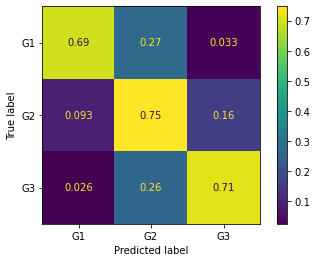

Classification report: 

              precision    recall  f1-score   support

          G1       0.76      0.69      0.72     33266
          G2       0.67      0.75      0.71     64207
          G3       0.77      0.71      0.74     54946

    accuracy                           0.72    152419
   macro avg       0.73      0.72      0.72    152419
weighted avg       0.73      0.72      0.72    152419

Micro-F1 score: 

0.7223180837034753
Macro-F1 score:
0.7223180837034753


In [12]:
prediction_test = rf_cls.predict(x_test_norm)

test_metrics = display_metrics(rf_cls,
                               x_test_norm,
                               y_test, prediction_test)

In [13]:
joblib.dump(rf_cls, 'results/rf_orig_lab3.joblib', compress=1)

['results/rf_orig_lab3.joblib']